<a href="https://colab.research.google.com/github/Shuraimi/fastai_DL_course/blob/main/six_vs_eight_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is inc

In [ ]:
from fastai.vision.all import *
from fastbook import *


Take the dataset MNIST from URLs

In [ ]:
path=untar_data(URLs.MNIST)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [ ]:
Path.BASE_PATH=path

In [ ]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/5'),Path('training/4'),Path('training/9'),Path('training/6'),Path('training/8'),Path('training/3'),Path('training/2'),Path('training/7'),Path('training/1')]

## Building a classifier of digits 6 and 8

In [ ]:
# taking paths
six=(path/'training/6').ls().sorted()
eight=(path/'training/8').ls().sorted()
len(six),len(eight)

(5918, 5851)

In [ ]:
six


(#5918) [Path('training/6/10017.png'),Path('training/6/10032.png'),Path('training/6/10036.png'),Path('training/6/10037.png'),Path('training/6/10044.png'),Path('training/6/10053.png'),Path('training/6/10076.png'),Path('training/6/10089.png'),Path('training/6/10101.png'),Path('training/6/10108.png')...]

<Axes: >

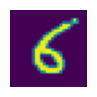

In [ ]:
# look at an image
img=Image.open(six[9])
show_image(img)

In [ ]:
tensor(img)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 255,  98,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,  73,  73, 134, 180, 128,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 120, 253, 252, 246,  92,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  42, 160, 2

In [ ]:
# creating stacked tensor
six_tensor=[tensor(Image.open(path)) for path in six]
len(six_tensor)

5918

In [ ]:
eight_tensor=[tensor(Image.open(path)) for path in eight]

In [ ]:
six_tensor[9]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 255,  98,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,  73,  73, 134, 180, 128,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 120, 253, 252, 246,  92,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  42, 160, 2

In [ ]:
# stack the tensors
six_stacked=torch.stack(six_tensor)
eight_stacked=torch.stack(eight_tensor)
len(six_stacked),len(eight_stacked)

(5918, 5851)

Forgot to convert to float and normalise
👀

In [ ]:
six_stacked=six_stacked.float()/255
eight_stacked=eight_stacked.float()/255

In [ ]:
six_stacked[9]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2471, 1.0000,
         0.3843, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0

### Valid stacked tensors the same way as train was created


In [ ]:
(path/'testing/8').ls()

(#974) [Path('testing/8/1287.png'),Path('testing/8/5578.png'),Path('testing/8/9712.png'),Path('testing/8/8958.png'),Path('testing/8/4737.png'),Path('testing/8/1499.png'),Path('testing/8/3588.png'),Path('testing/8/7244.png'),Path('testing/8/947.png'),Path('testing/8/9681.png')...]

In [ ]:
# grab paths of six and eight from valid folder of path
six_valid=(path/'testing/6').ls().sorted()
eight_valid=(path/'testing/8').ls().sorted()
len(six_valid),len(eight_valid)

(958, 974)

In [ ]:
# convert them into tensors and store in a list
six_valid_tensor=[tensor(Image.open(path)) for path in six_valid]
eight_valid_tensor=[tensor(Image.open(path)) for path in eight_valid]

In [ ]:
# stack the tensors
six_valid_stacked=torch.stack(six_valid_tensor)
eight_valid_stacked=torch.stack(eight_valid_tensor)

Forgot to normalise tensors and convert to float (looked)
👀

In [ ]:
six_valid_stacked=six_valid_stacked.float()/255
eight_valid_stacked=eight_valid_stacked.float()/255

### Creating train and test sets

In [ ]:
#train set
train_x=torch.cat((six_stacked,eight_stacked)).view(-1,28*28)
train_x.shape

torch.Size([11769, 784])

In [ ]:
# train labels
train_y=tensor([1]*len(six)+[0]*len(eight)).unsqueeze(1)
train_y.shape

torch.Size([11769, 1])

In [ ]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [ ]:
# test set
# concatenate valid stacked tensors
valid_x=torch.cat((six_valid_stacked,eight_valid_stacked)).view(-1,28*28)
valid_x.shape

torch.Size([1932, 784])

In [ ]:
# create valid labels
valid_y=tensor([1]*len(six_valid)+[0]*len(eight_valid)).unsqueeze(1)
valid_y.shape

torch.Size([1932, 1])

### Create train and test dataset 👀

In [ ]:
dset=list(zip(train_x,train_y))

In [ ]:
valid_dset=list(zip(valid_x,valid_y))

❓❓below code

In [ ]:
dl=DataLoader(dset,batch_size=256)

In [ ]:
xb,yb=first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl=DataLoader(valid_dset)

In [ ]:
len(xb)

256

In [ ]:
xb

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
help(torch.unsqueeze)

Help on built-in function unsqueeze in module torch:

unsqueeze(...)
    unsqueeze(input, dim) -> Tensor
    
    Returns a new tensor with a dimension of size one inserted at the
    specified position.
    
    The returned tensor shares the same underlying data with this tensor.
    
    A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
    can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
    applied at :attr:`dim` = ``dim + input.dim() + 1``.
    
    Args:
        input (Tensor): the input tensor.
        dim (int): the index at which to insert the singleton dimension
    
    Example::
    
        >>> x = torch.tensor([1, 2, 3, 4])
        >>> torch.unsqueeze(x, 0)
        tensor([[ 1,  2,  3,  4]])
        >>> torch.unsqueeze(x, 1)
        tensor([[ 1],
                [ 2],
                [ 3],
                [ 4]])



## Stochastic Gradient Descent(SGD)

Step 1: Initialise parameters

In [ ]:
def init_params(size,std=1.0):
    return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights=init_params((28*28,1))
bias=init_params(1)

In [ ]:
weights[2]

tensor([0.6784], grad_fn=<SelectBackward0>)

Step 2: Make predictions

In [ ]:
# function in order to make predictions
def linear1(xb):
    return xb@weights + bias

In [ ]:
weights.dtype

torch.float32

In [ ]:
bias.dtype

torch.float32

In [ ]:
train_x.dtype

torch.float32

In [ ]:
preds=linear1(train_x)
preds

tensor([[ 4.4854],
        [-2.0266],
        [ 6.7003],
        ...,
        [-2.1655],
        [ 1.7047],
        [ 6.0797]], grad_fn=<AddBackward0>)

Step 3:Define loss function

In [ ]:
def mnist_loss(predictions,targets):
    preds=predictions.sigmoid()
    return torch.where(targets==1,1-preds,preds).mean()

Step 4:Calculate gradients

In [ ]:
lr=1e-5

In [ ]:
def calc_grad(xb,yb,model):
    preds=model(xb)
    loss=mnist_loss(preds,yb)
    loss.backward()

Step 5:Repeat the process

Step 6:Step

Step 7:Stop

In [ ]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data-=p.grad*lr
            p.grad.zero_()

In [ ]:
# batch accuracy
def batch_accuracy(xb,yb):
    preds=xb.sigmoid()
    return ((preds>0.5)==yb).float().mean()

In [ ]:
batch_accuracy(preds,train_y)

tensor(0.5512)

In [ ]:
# validate accuracy
def validate_epoch(model):
    accs=[batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [ ]:
# putting steps together
lr=1
params=weights,bias # important
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.5849

In [ ]:
# 20 epochs
for i in range(20):
    train_epoch(linear1,lr,params)
    print(validate_epoch(linear1),end=' ')

0.7133 0.8421 0.9172 0.9472 0.9612 0.9669 0.97 0.972 0.9736 0.9777 0.9788 0.9798 0.9819 0.9819 0.9829 0.9834 0.9834 0.984 0.9834 0.9834 

Creating model using `nn.Linear`
👀

In [ ]:
linear_model=nn.Linear(28*28,1)

In [ ]:
w,b=linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

Using an optimiser



In [ ]:
# defining an optimiser
class BasicOptim:
    def __init__(self,params,lr):
        self.params,self.lr=list(params),lr
    def step(self,*args,**kwargs):
        for p in self.params:
            p.data-=p.grad.data*self.lr
    def zero_grad(self,*args,**kwargs):
        for p in self.params:
            p.grad=None

In [ ]:
opt=BasicOptim(linear_model.parameters(),lr)


In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.486

In [ ]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model),end=' ')

In [ ]:
train_model(linear_model,20)

0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.5575 0.8204 0.897 0.9275 0.942 0.9529 0.9591 0.9633 

Using SGD

In [ ]:
linear_model=nn.Linear(28*28,1)
opt=SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.619 0.8307 0.9006 0.9275 0.9446 0.9539 

In [ ]:
# create dataloaders
dls=DataLoaders(dl,valid_dl)

In [ ]:
learn=Learner(dls,nn.Linear(28*28,1),loss_func=mnist_loss,opt_func=SGD,metrics=batch_accuracy)

In [ ]:
learn.fit(20,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.618089,0.504136,0.495859,00:02
1,0.613422,0.504133,0.495859,00:02
2,0.612231,0.504131,0.495859,00:02
3,0.611820,0.504128,0.495859,00:02
4,0.611663,0.504124,0.495859,00:02
5,0.611597,0.504119,0.495859,00:02
6,0.611566,0.504114,0.495859,00:02
7,0.611547,0.504106,0.495859,00:02
8,0.611531,0.504097,0.495859,00:02
9,0.611513,0.504084,0.495859,00:03
